# Overhead

In this notebook we will analyze what speed-up's we can achieve with different problem sizes. We take as an example the quicksort algorithm, and measure the speed-up with different list lengths in the range of [100,3100]. We keep the thread number constant at 64. 

In the general parallel program of quicksort I have implemented a threshold. If the list length is larger than the threshold value, the parallelized algorithm is called; otherwise the serial version of the algorithm. For this notebook, however, it does not make sense to use such a threshold. We want to find out how large the list has to be, in order to make the use of parallelism worth it (speed-up larger than 1).  

Therefore we are not using the general program for quicksort, but a special version called `quicksort_overhead.c`. The only difference with this version is that there is no threshold. No matter how small the list length is, we will always call the parallelized algorithm.

In [1]:
%cd ~/performance/programs/quicksort

import numpy as np
list_length = np.arange(100,3300,200)

/home/jovyan/performance/programs/quicksort


In [2]:
time_parallel = []
time_serial =[]

# measure execution time of various list lengths, with 100 repeats and 64 threads
! ./overhead.o 64 100 100 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./overhead.o 1 100 100 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./overhead.o 64 100 300 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./overhead.o 1 100 300 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./overhead.o 64 100 500 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./overhead.o 1 100 500 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./overhead.o 64 100 700 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./overhead.o 1 100 700 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./overhead.o 64 100 900 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./overhead.o 1 100 900 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./overhead.o 64 100 1100 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./overhead.o 1 100 1100 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./overhead.o 64 100 1300 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./overhead.o 1 100 1300 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./overhead.o 64 100 1500 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./overhead.o 1 100 1500 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./overhead.o 64 100 1700 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./overhead.o 1 100 1700 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./overhead.o 64 100 1900 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./overhead.o 1 100 1900 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./overhead.o 64 100 2100 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./overhead.o 1 100 2100 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./overhead.o 64 100 2300 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./overhead.o 1 100 2300 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./overhead.o 64 100 2500 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./overhead.o 1 100 2500 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./overhead.o 64 100 2700 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./overhead.o 1 100 2700 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./overhead.o 64 100 2900 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./overhead.o 1 100 2900 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./overhead.o 64 100 3100 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./overhead.o 1 100 3100 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))

In [3]:
speedup = np.array(time_serial)/np.array(time_parallel)

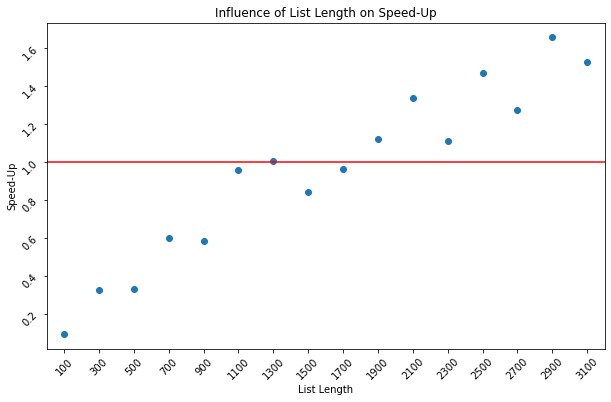

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# plot
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(list_length,speedup)
ax.set_xticks(list_length)
ax.set_xticklabels(list_length)
ax.set_ylabel('Speed-Up')
ax.set_xlabel('List Length')
ax.set_title('Influence of List Length on Speed-Up');
ax.plot(np.arange(0,3400,100),np.ones(34),c='red')
ax.tick_params(rotation=45)
ax.set_xlim([0, 3200]);